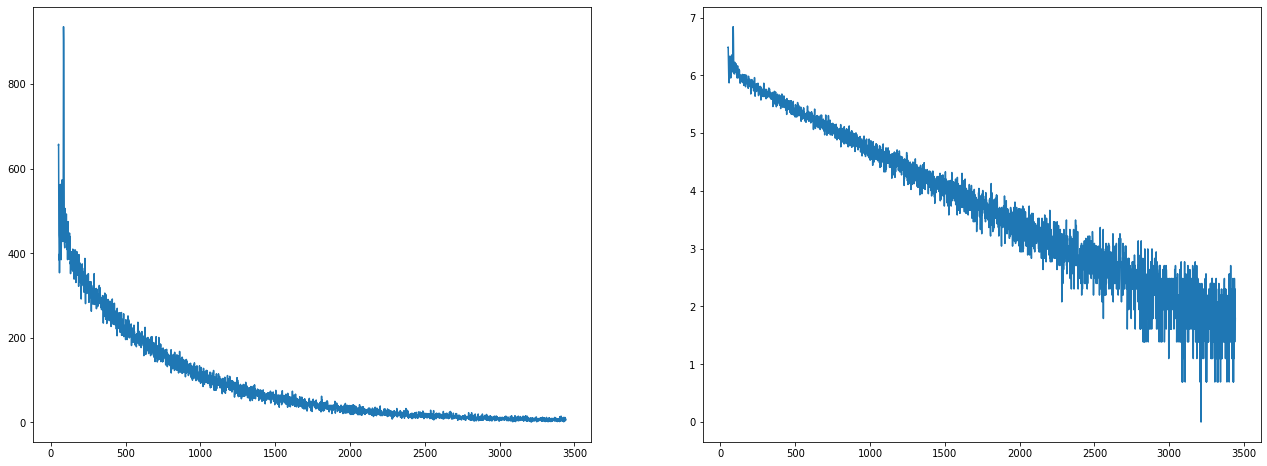

(3392,)


In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = np.zeros((16384), np.int32)

def addData(path):
    f = open(path, "r")
    for i in range(12):
        f.readline()

    for i in range(16383):
        data[i] += int(f.readline())

    f.close()

addData("0227_Data.Spe")
addData("0306_Data.Spe")
addData("0308_Data.Spe")
addData("0315_Data.Spe")
addData("0403_Data.Spe")


left_chop = 51
right_chop = np.where(data[left_chop:] == 0)[0][0]

bins = np.arange(0, 16384, 1)

bins_chopped = bins[left_chop:right_chop]
data_chopped = data[left_chop:right_chop]

log_data_chopped = np.log(data_chopped)

fig, axes = plt.subplots(1, 2, figsize = (22, 8))

axes[0].plot(bins_chopped, data_chopped)
axes[1].plot(bins_chopped, log_data_chopped)
plt.show()

print(data_chopped.shape)


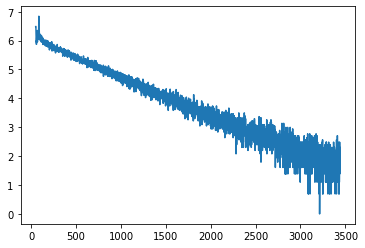

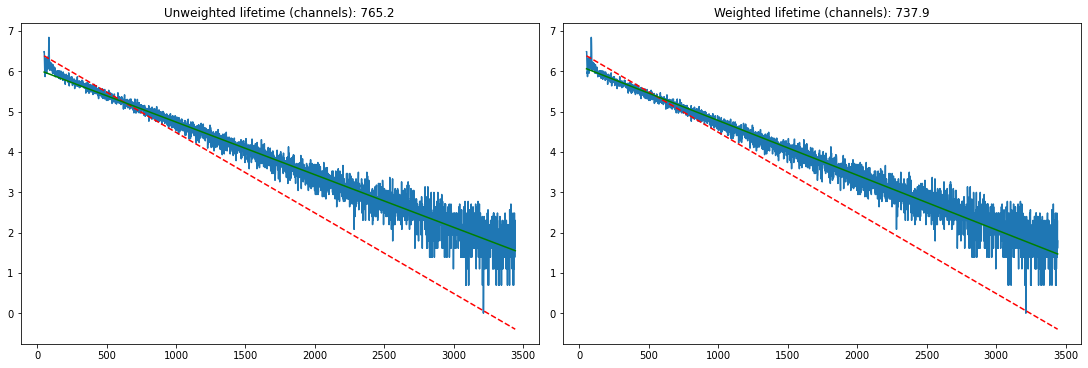

Fitted lifetime (channels): 737.9


In [35]:
from scipy.optimize import curve_fit

fig, ax = plt.subplots()
ax.plot(bins_chopped,log_data_chopped)
plt.show()
#chopRight = 5000
p0 = (log_data_chopped[0], -1/500)
def func_lin(t,p0, p1):
    return p0+p1*t

fig, axs = plt.subplots(1,2, figsize = (15,5),constrained_layout = True)
axs[0].set_title("Unweighted")
axs[0].plot(bins_chopped,log_data_chopped)
popt, pcov = curve_fit(func_lin, bins_chopped, log_data_chopped, p0)
axs[0].plot(bins_chopped,func_lin(bins_chopped,*p0), '--r')
axs[0].plot(bins_chopped,func_lin(bins_chopped,*popt), '-g')
title = "Unweighted lifetime (channels): {:5.1f}".format(-1/popt[1])
axs[0].set_title(title)

axs[1].plot(bins_chopped,log_data_chopped)

sigmas = 1/np.sqrt(data_chopped)
popt, pcov = curve_fit(func_lin, bins_chopped, log_data_chopped, p0, sigma = sigmas)
axs[1].plot(bins_chopped,func_lin(bins_chopped,*p0), '--r')
axs[1].plot(bins_chopped,func_lin(bins_chopped,*popt), '-g')
title = "Weighted lifetime (channels): {:5.1f}".format(-1/popt[1])
axs[1].set_title(title)
plt.show()
print("Fitted lifetime (channels): {:5.1f}".format(-1/popt[1]))

fittedLifetime = -1/popt[1]

16384
512 512


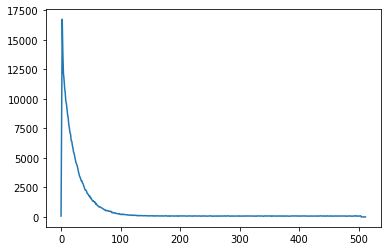

2 108


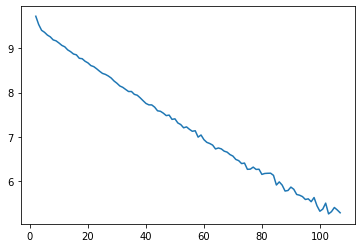

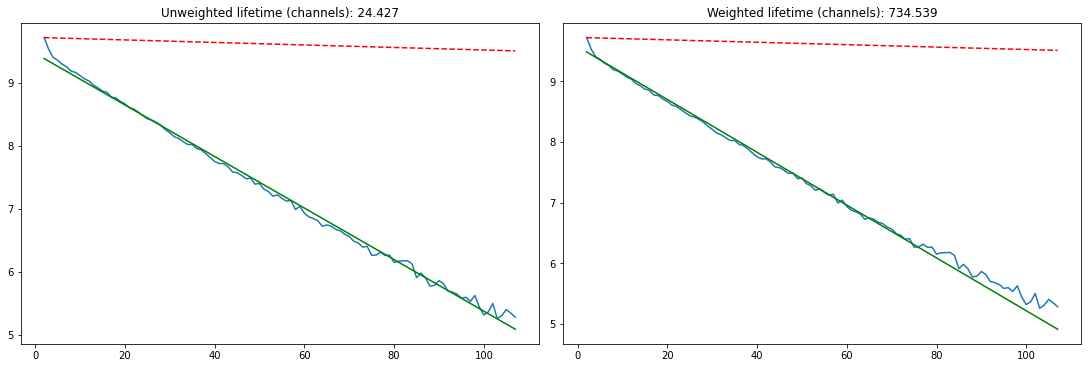

Weighted lifetime (channels): 734.539


In [36]:
print(len(data))

data32 = data.reshape(-1, 32).sum(axis = 1)

bins = np.arange(0, len(data32))

print(len(data32), len(bins))

fig, ax = plt.subplots()
ax.plot(bins, data32)
plt.show()

from scipy.optimize import curve_fit

left_chop32 = int(left_chop / 32) + 1
right_chop32 = int(right_chop / 32) + 1
print(left_chop32, right_chop32)

data32_chopped = data32[left_chop32:right_chop32]
logData32_chopped = np.log(data32_chopped)
bins_chopped32 = bins[left_chop32:right_chop32]

fig, ax = plt.subplots()
ax.plot(bins_chopped32, logData32_chopped)
plt.show()

p0 = (logData32_chopped[0], -1/500)
def func_lin(t,p0, p1):
    return p0+p1*t
bins_chopped32
fig, axs = plt.subplots(1,2, figsize = (15,5),constrained_layout = True)
axs[0].set_title("Unweighted")
axs[0].plot(bins_chopped32,logData32_chopped)
popt, pcov = curve_fit(func_lin, bins_chopped32, logData32_chopped, p0)
axs[0].plot(bins_chopped32,func_lin(bins_chopped32,*p0), '--r')
axs[0].plot(bins_chopped32,func_lin(bins_chopped32,*popt), '-g')
title = "Unweighted lifetime (channels): {:5.3f}".format(-1/popt[1])
axs[0].set_title(title)

axs[1].plot(bins_chopped32,logData32_chopped)


sigmas = 1/np.sqrt(data32_chopped)
popt, pcov = curve_fit(func_lin, bins_chopped32, logData32_chopped, p0, sigma = sigmas)
axs[1].plot(bins_chopped32,func_lin(bins_chopped32,*p0), '--r')
axs[1].plot(bins_chopped32,func_lin(bins_chopped32,*popt), '-g')
title = "Weighted lifetime (channels): {:5.3f}".format(-32/popt[1])
axs[1].set_title(title)
plt.show()
print("Weighted lifetime (channels): {:5.3f}".format(-32/popt[1]))

weightedLifetime = -32/popt[1]


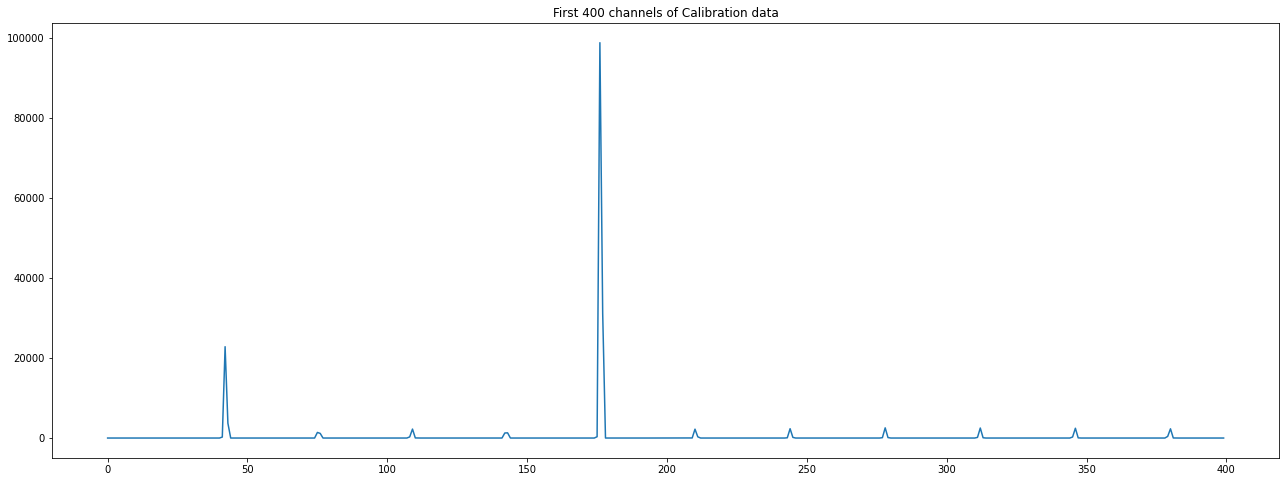

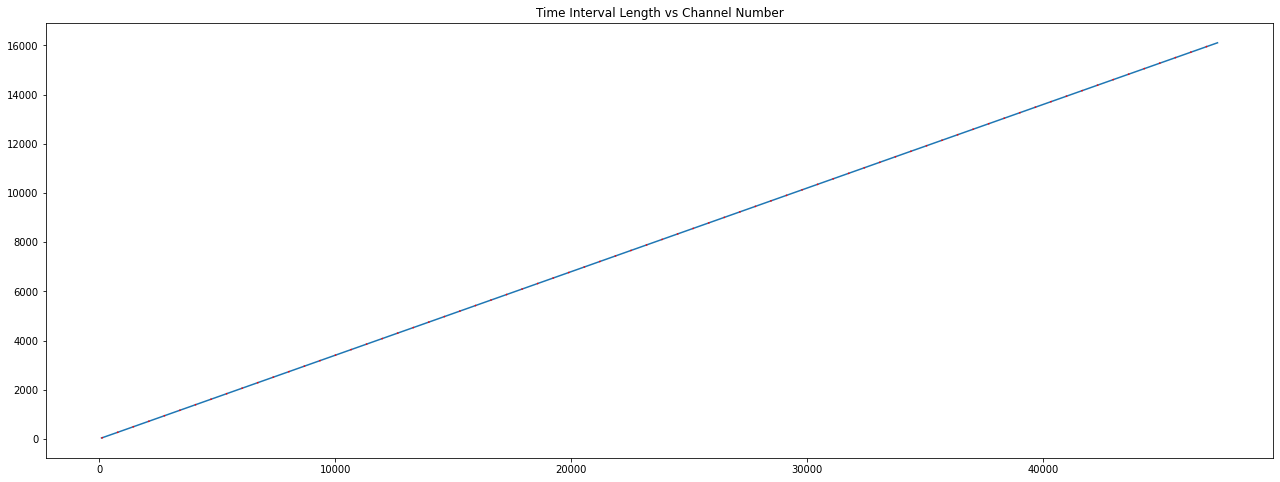

In [44]:
from scipy.signal import find_peaks

calibrationData = np.zeros((16384), np.int32)

def addData(path):
    f = open(path, "r")
    for i in range(12):
        f.readline()

    for i in range(16383):
        calibrationData[i] += int(f.readline())

    f.close()

addData("0301_calibration1.Spe")

bins = np.arange(0, 16384)

fig, ax = plt.subplots(1, 1, figsize = (22, 8))

ax.plot(bins[:400], calibrationData[:400])
ax.set_title("First 400 channels of Calibration data")
plt.show()

peaks, _ = find_peaks(calibrationData, height = 500, threshold=0.5)
peaks_df = calibrationData[peaks][:]

time_intervals = np.arange(100, 50000, 100)[:len(peaks)]

p0 = (peaks[0], 16384.0 / 50000.0)
def func_lin(t,p0, p1):
    return p0+p1*t

popt, pcov = curve_fit(func_lin, time_intervals, peaks, p0)

fig, ax = plt.subplots(1, 1, figsize = (22, 8))

ax.plot(time_intervals, peaks)
ax.set_title("Time Interval Length vs Channel Number")
ax.plot(time_intervals,func_lin(time_intervals,*popt), linestyle=(0, (1, 10)), color='red')
plt.show()

channelsToTime = 1/popt[1]



In [43]:
print(f"Fitted Lifetime (No Binning): {channelsToTime * fittedLifetime:7.4f} ns")
print(f"Weighted Lifetime (Binned, greater precision): {channelsToTime * weightedLifetime:7.4f} ns")

Fitted Lifetime (No Binning): 2172.4264 ns
Weighted Lifetime (Binned, greater precision): 2162.4123 ns


In need of uncertainty calculation. I will look into doing that tomorrow.